<a href="https://colab.research.google.com/github/weathon/slay/blob/main/BinaryCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# simple binary search review
import numpy as np

arr = [1, 3, 5, 6, 8, 10, 11, 12, 1, 80, 90, 165, 500, 600]
target = 600
left = 0
right = len(arr)-1
while True:
  mid = int((left+right)/2)
  if right-left==1:
    mid=right

  if arr[mid] == target:
    print(mid)
    break
  if arr[mid] < target:
    left = mid
  if arr[mid]>target:
    right=mid

13


In [ ]:
# cut to half
arr = np.random.normal(size=88)
left = 0
right = len(arr)-1
threshold = (max(arr)-min(arr))/2
Ts = []
while True:
  LC = 0
  RC = 0
  for i in arr:
    if i<threshold:
      LC+=1
    else:
      RC+=1
    
  if LC<RC: #outside for
    threshold = (threshold+max(arr))/2
  elif RC<LC:
    threshold = (threshold+min(arr))/2
  # print(LC, RC, threshold)
  Ts.append(threshold)

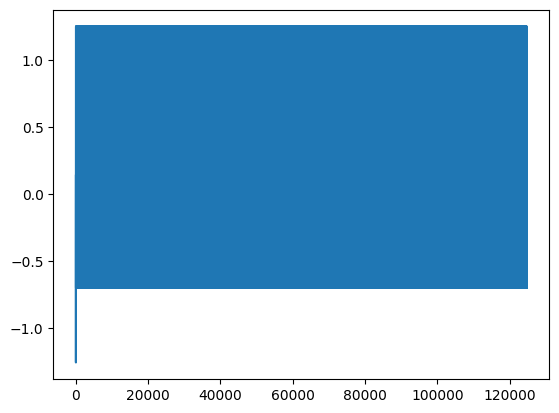

In [21]:
import pylab
pylab.plot(Ts)

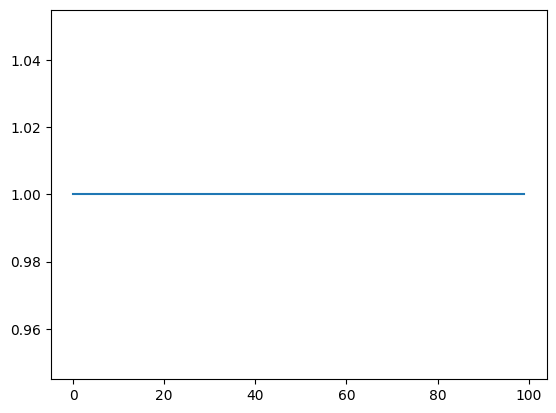

In [70]:
# cut to half
arr = [1]
for _ in range(100):
  arr.append(arr[-1]+abs(np.random.normal())) #it will not work if it iis unform? normal has plus and minus
left = 0
right = len(arr)-1
threshold = 1
Ts = []
for _ in range(100):
  LC = 0
  RC = 0
  for i in arr:
    if i<threshold:
      LC+=1
    else:
      RC+=1
    
  # threshold *= (RC/(LC+RC))
  # threshold+=
  # if LC<RC: #outside for
  #   # threshold = threshold+(RC-LC)*0.1
  #   threshold*=1.1
  # elif RC<LC:
  #   np.random.normal()*=0.9
    # threshold = threshold-(LC-RC)*0.1 not useful when too far
  # print(LC, RC, threshold)
  Ts.append(threshold)
pylab.plot(Ts)


In [68]:
LC,RC

(0, 101)

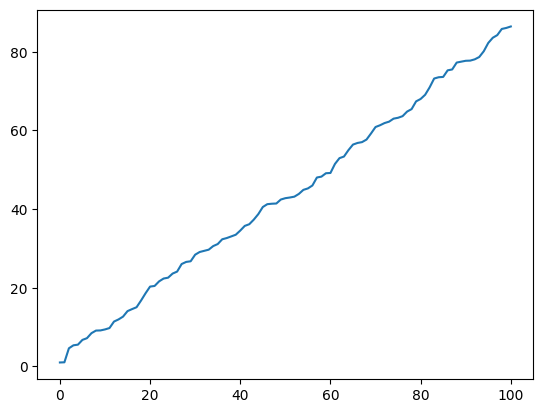

In [60]:
pylab.plot(arr)